# DTSC-670 Final Project
## Part 1: Technical Implementation

### Name: Isabella Varela Castillo

## Academic Integrity

**Key Principle: All work must be your own**

Plagiarism checks will be conducted at the end of the term for both code and written documents.

While you may look online for inspiration, all work in your project must be your own. Do not copy ideas from online sources or collaborate with classmates. Do not use Large Language Models (LLMs) to write your code. Relying on LLMs undermines your learning experience and violates academic ethics. This course is designed to develop your skills.

Do not share or post your work online. Use private repositories if needed. 

Violations will result in a zero grade for the assignment, possible failure of the course, and potential dismissal from the program.

## Overview

### Machine Learning Task
Suppose you work in the Advising Team for a large Portuguese school system, and your school director has asked you to analyze student data and create a machine learning model to predict a student’s performance based on select features. Your director hopes to use this information to identify students who might need additional assistance and interventions to improve their grades.

Your task is to create a regression model to predict a student's grade. You will need to clean and prepare the data to ensure it is suitable for analysis. After building the model, you will evaluate its performance using appropriate metrics to assess its accuracy and effectiveness.

### Note
Follow the instructions carefully and submit your notebook to CodeGrade for testing. Ensure you name the variables as indicated, as CodeGrade requires specific naming for proper evaluation.

## Get the Data

Begin by importing and inspecting your dataset to ensure it is correctly loaded and understand its structure. This initial step sets the foundation for your analysis and modeling.

1) **Import the Data**: Correctly import your data.
2) **Initial Data Check**: Check the initial data, including size and data types.
3) **Identify the Target**: Identify the target attribute.
4) **Split the Data**: Split your data into training and test sets using the variable names `X_train`, `X_test`, `y_train`, and `y_test`.  Use `test_size=0.2` and `random_state=42`.
5) **Comment Your Code**: Get into the habit of including comments in your code. Comments should explain <u>why</u> decisions were made, while the code should be clean enough to read and understand <u>what</u> the program does. 

<span style="color:red">Do not make changes to these training and test set DataFrames going forward. If you need to make changes, save them with a different name. CodeGrade will check them in their original form.</span>

*You may add additional markdown and code blocks to this template as needed.*

In [1]:
# standard imports
import pandas as pd
import numpy as np

# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', 20)
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Import the CSV file and save it as DF
data= pd.read_csv('student-mat.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences_G1', 'absences_G2', 'absences_G3', 'G1',
       'G2', 'G3'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

# Columns to drop
columns_to_drop = ['address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'romantic', 'Dalc', 'Walc']

# Drop the specified columns
filtered_data = data.drop(columns=columns_to_drop)

# Features and target variable
X = data.drop(columns=['G3'])
y = data['G3']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [15]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   famsize      395 non-null    object 
 4   Medu         395 non-null    int64  
 5   Fedu         395 non-null    int64  
 6   guardian     395 non-null    object 
 7   traveltime   395 non-null    int64  
 8   studytime    395 non-null    int64  
 9   failures     395 non-null    int64  
 10  schoolsup    395 non-null    object 
 11  famsup       395 non-null    object 
 12  paid         395 non-null    object 
 13  activities   395 non-null    object 
 14  nursery      395 non-null    object 
 15  higher       395 non-null    object 
 16  internet     395 non-null    object 
 17  famrel       395 non-null    int64  
 18  freetime     395 non-null    int64  
 19  goout   

## Explore the Data
Understanding your data is a crucial step before building any machine learning model. This exploration phase helps you identify patterns, detect anomalies, and uncover insights that will guide your modeling decisions. By thoroughly analyzing and visualizing the data, you can make informed choices on feature selection and preprocessing, ultimately improving your model's performance and reliability.

This section won't be automatically graded, but you must include your analytical insight and screenshots of your plots in the Executive Summary report.

In this section you should:
1) **Study Attributes**: Thoroughly study the training set attributes and their characteristics.
2) **Visualizations**: Use visualizations to effectively analyze and explore your data. Be ready to explain what the visualization shows and why it is important.  
3) **Correlations**: Analyze correlations between your numeric attributes.

*CodeGrade will only have matplotlib and seaborn libraries loaded. You can use other libraries (e.g., Plotly) or use software (e.g., Tableau) for your visualizations, but comment out any code that is not matplotlib or seaborn before submitting to CodeGrade including import statements.*

You will include your analysis and at least three plots in your Executive Summary. Use either screenshots and paste them into your Executive Summary document or the `savefig()` method. Here's example code for saving a plot in different file formats:
```
import matplotlib.pyplot as plt

# Your plotting code here
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Sample Plot')

# Save the plot as a PNG file
plt.savefig('my_plot.png')

# Optionally, save in other formats
plt.savefig('my_plot.pdf')
plt.savefig('my_plot.jpg')
```

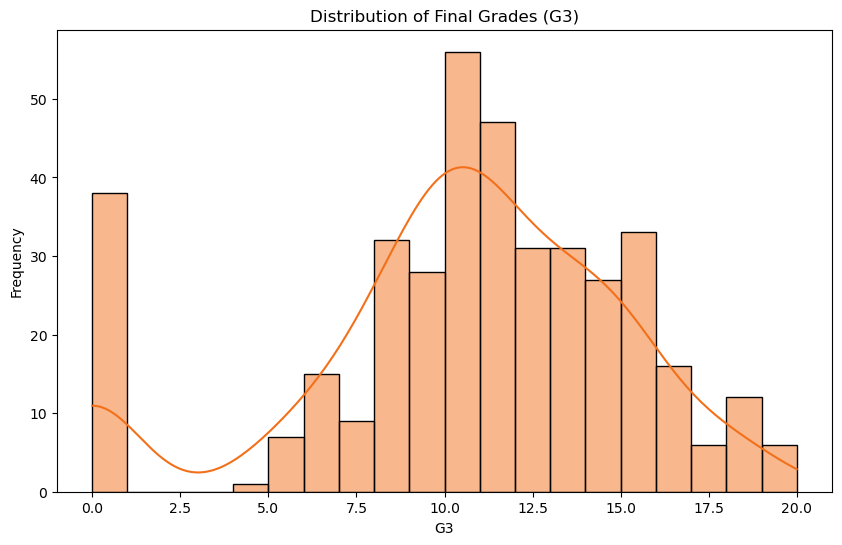

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the colormap to a sequential orange palette
cmap = sns.color_palette("Oranges", as_cmap=True)

# 1. Histogram of the 'G3' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='G3', bins=20, kde=True, color=cmap(0.6))
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()


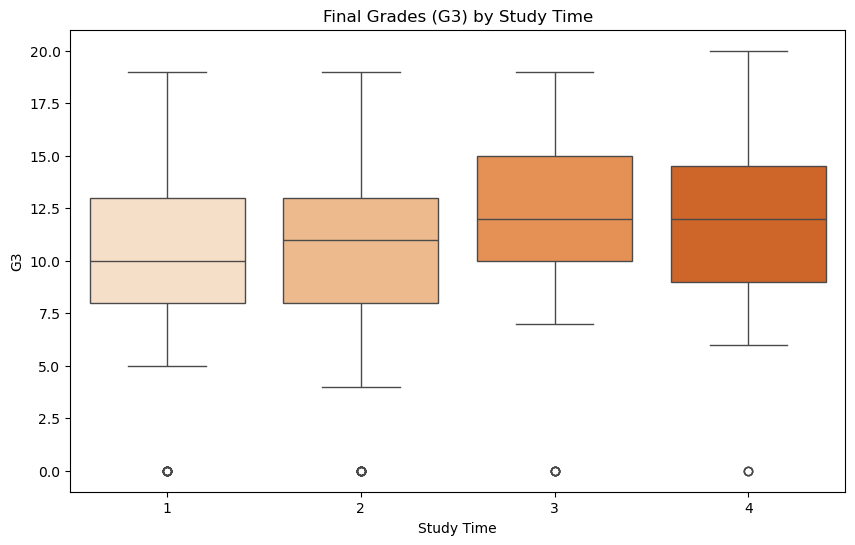

In [19]:
# Setting the colormap to a sequential orange palette 
cmap2 = sns.color_palette("Oranges", n_colors=5)
# Box Plot of 'G3' by 'studytime'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['studytime'], y=data['G3'], palette=cmap2)
plt.title('Final Grades (G3) by Study Time')
plt.xlabel('Study Time')
plt.ylabel('G3')
plt.show()

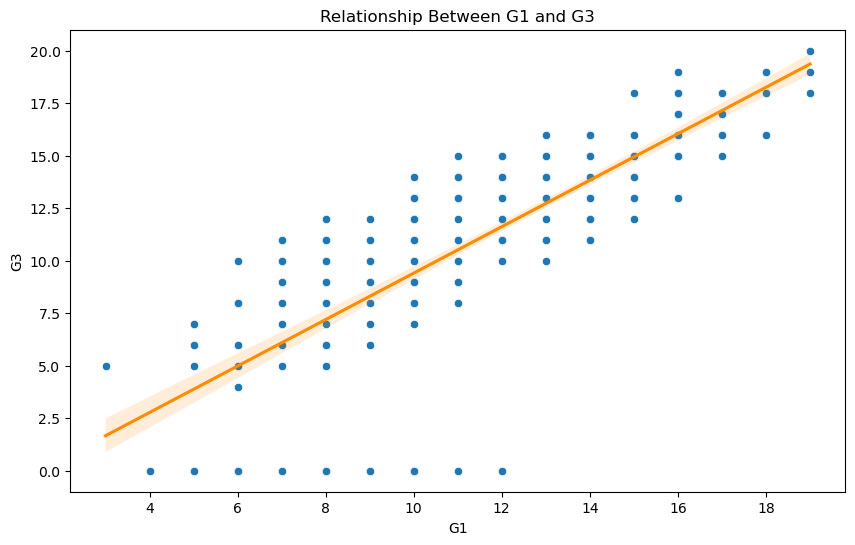

In [21]:
# Setting the colormap to a sequential orange palette 
cmap3 = sns.color_palette("Oranges", as_cmap=True)
# Scatter Plot of 'G1' vs 'G3'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['G1'], y=data['G3'], palette=cmap3)
sns.regplot(x=data['G1'], y=data['G3'], scatter=False, color='darkorange')
plt.title('Relationship Between G1 and G3')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

## Prepare the Data

### Feature Selection

Based on your data exploration, begin considering the features you want to include in your model. Limiting your data can be beneficial because it reduces complexity and can improve model performance by focusing on the most relevant features.

Create lists below for the columns you want to use in your model based on your exploration above. These features will be used in the column transformer. The list names must match exactly.

- **numeric_columns**: This is your continuous numerical data that MUST include `absences_G1`, `absences_G2`, `absences_G3`, `G1`, and `G2` for use in your custom transformer, in addition to any other numerical columns you want to select. Note: The fact that a column is labeled as an integer or float does not necessarily indicate that it contains continuous data.
- **categorical_columns**: Include at least one categorical column.
- **ordinal_columns**: Include at least one ordinal column.

In [23]:
numeric_columns = ['age', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 'freetime', 'goout', 'health', 'famrel', 'traveltime', 'studytime', 'failures']
categorical_columns = ['school', 'sex', 'famsize', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']
ordinal_columns = ['Medu', 'Fedu']

### Custom Transformer
We want to create a new column that sums the three absences columns together as a new feature. Additionally, we want to  conditionally keep or drop the grades for the first and second terms based on the parameters passed.

G3 is the final year grade and is highly correlated with G2 and G1, which are grades from the first two terms. Predicting G3 without using G2 and G1 is more challenging but also more valuable since you could make predictions earlier in the year. Therefore, later we will create separate models (one that includes the G1 and G2 columns and one that excludes them) to test this.

#### Instructions for Submission

Create a custom transformer that:

- Inherits from BaseEstimator and TransformerMixin.
- Implements the fit and transform methods.
- Accepts a DataFrame as input. This differs from the California Housing Prices example, which used arrays. We will pass a DataFrame into the custom transformer to allow for easier testing with CodeGrade.
- In the transform method:
    - Create a new column called `absences_sum` that sums the `absences_G1`, `absences_G2`, and `absences_G3` columns, adds the new `absences_sum` column to the end of the DataFrame, then drops the original three absence columns.
    - Drop the `G1` and `G2` columns if the parameter `drop_grades` is `True`. It will keep the columns if `drop_grades` is `False`.
- Name the custom transformer class `FinalProjectTransformer`.

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class FinalProjectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades=True):
        self.drop_grades = drop_grades

    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything from the data
        return self

    def transform(self, X):
        # Create a copy of the DataFrame to avoid modifying the original data
        X_copy = X.copy()
        
        # Create the new column 'absences_sum'
        X_copy['absences_sum'] = X_copy['absences_G1'] + X_copy['absences_G2'] + X_copy['absences_G3']
        
        # Drop the original absences columns
        X_copy.drop(columns=['absences_G1', 'absences_G2', 'absences_G3'], inplace=True)
        
        # Conditionally drop the G1 and G2 columns
        if self.drop_grades:
            X_copy.drop(columns=['G1', 'G2'], inplace=True)
        
        return X_copy

### Data Pipelines Instructions
Creating data pipelines allows you to automate your data cleaning process, making it easy to apply the same transformations to new data. Follow the outline below to transform your dataset into two sets of transformed data: one with the G1/G2 columns and one without them.

#### Instructions for Submission
- Numeric Pipeline (you'll need to create two to handle the G1/G2 requirement)
  - Impute missing values using SimpleImputer() (use [.set_output(transform="pandas")](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html) to output a DataFrame from your SimpleImputer into your custom transformer) 
  - Transform data using the custom transformer FinalProjectTransformer as appropriate for the task
  - Standardize the data using StandardScalar()
  - Use the following variable names:
    - `numeric_pipeline_with_grades`
    - `numeric_pipeline_without_grades`

- Categorical Pipeline
  - Impute missing values 
  - One-Hot Encode (OHE) categorical data 
  - Use the following variable name:
    - `categorical_pipeline`

- Ordinal Pipeline
  - Impute missing values 
  - Ordinal encode the data
  - Use the following variable name:
    - `ordinal_pipeline`

- Column Transformer (you'll need to create two to handle the two different numeric pipelines)
  - pass in your previously created feature selection lists
  - Combine the numeric, categorical, and ordinal pipelines
  - Use the following variable names:
    - `column_transformer_with_grades`
    - `column_transformer_without_grades`
    
Once the full pipeline is set up, fit and transform `X_train`, saving the results as `X_train_transformed_with_grades` and `X_train_transformed_without_grades`. Confirm that the transformed data without grades has two fewer columns.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Custom transformer
class FinalProjectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades=True):
        self.drop_grades = drop_grades

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['absences_sum'] = X_copy['absences_G1'] + X_copy['absences_G2'] + X_copy['absences_G3']
        X_copy.drop(columns=['absences_G1', 'absences_G2', 'absences_G3'], inplace=True)
        if self.drop_grades:
            X_copy.drop(columns=['G1', 'G2'], inplace=True)
        return X_copy

# Numeric pipeline with grades
numeric_pipeline_with_grades = Pipeline([
    ('imputer', SimpleImputer(strategy='mean').set_output(transform="pandas")),
    ('custom_transformer', FinalProjectTransformer(drop_grades=False)),
    ('scaler', StandardScaler())
])

# Numeric pipeline without grades
numeric_pipeline_without_grades = Pipeline([
    ('imputer', SimpleImputer(strategy='mean').set_output(transform="pandas")),
    ('custom_transformer', FinalProjectTransformer(drop_grades=True)),
    ('scaler', StandardScaler())
])


In [29]:
from sklearn.preprocessing import OneHotEncoder

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent').set_output(transform="pandas")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [31]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal pipeline
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent').set_output(transform="pandas")),
    ('ordinal', OrdinalEncoder())
])


In [33]:
from sklearn.compose import ColumnTransformer

# Lists for the columns
numeric_columns = ['age', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 'freetime', 'goout', 'health', 'famrel', 'traveltime', 'studytime', 'failures']
categorical_columns = ['school', 'sex', 'famsize', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']
ordinal_columns = ['Medu', 'Fedu']

# Column transformer with grades
column_transformer_with_grades = ColumnTransformer([
    ('numeric', numeric_pipeline_with_grades, numeric_columns),
    ('categorical', categorical_pipeline, categorical_columns),
    ('ordinal', ordinal_pipeline, ordinal_columns)
])

# Column transformer without grades
column_transformer_without_grades = ColumnTransformer([
    ('numeric', numeric_pipeline_without_grades, numeric_columns),
    ('categorical', categorical_pipeline, categorical_columns),
    ('ordinal', ordinal_pipeline, ordinal_columns)
])

In [35]:
# Fit and transform the data
X_train_transformed_with_grades = column_transformer_with_grades.fit_transform(X_train)
X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train)

In [37]:
# Confirming the transformed data shapes
print("Transformed training data with grades shape:", X_train_transformed_with_grades.shape)
print("Transformed training data without grades shape:", X_train_transformed_without_grades.shape)

Transformed training data with grades shape: (316, 36)
Transformed training data without grades shape: (316, 34)


## Shortlist Promising Models
In this section, you will fit and compare three regression models to your transformed data, both with and without the G1/G2 columns, using cross-validation. Follow the steps below, using the specified variable names.

1) **Initialize Three Regression Models**
- Linear Regression
- Support Vector Machine (SVM) Regression
- Lasso Regression

2) **Compare Models with Cross-Validation**
- Using the above models, perform cross-validation on each model using both sets of transformed data (with and without G1/G2 columns).

### Instructions for Submission
1) **Initialize the Models**: Instantiate a Linear Regression, SVM Regression, and Lasso Regression model.
  - Use the specified variable names for the respective models:
    - `lin_reg`
    - `svm_reg`
    - `lasso_reg`
2) **Cross-Validation**: Using both sets of transformed data (with and without G1/G2 columns), perform 3-fold cross-validation for each model using RMSE as the metric.
  - You will run cross-validation six times (e.g., cross-validation of the linear regression model with the G1/G2 data, cross-validation of the linear regression model without the G1/G2 data, etc.)
  - Use the specified variable names to save each respective array of scores:
    - `cv_scores_lin_reg_with_grades`
    - `cv_scores_lin_reg_without_grades`
    - `cv_scores_svm_with_grades`
    - `cv_scores_svm_without_grades`
    - `cv_scores_lasso_with_grades`
    - `cv_scores_lasso_without_grades`
  - Use the specified variable names to save the mean of each cross-validation array and print it to view your mean scores:
    - `rmse_lin_reg_with_grades`
    - `rmse_lin_reg_without_grades`
    - `rmse_svm_with_grades`
    - `rmse_svm_without_grades`
    - `rmse_lasso_with_grades`
    - `rmse_lasso_without_grades`

*You are welcome to test and fit more regression models as long as the above three are included and named appropriately*

In [39]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Initialize the models
lin_reg = LinearRegression()
svm_reg = SVR()
lasso_reg = Lasso()

In [55]:
# Define a function to calculate RMSE from cross-validation scores
def calculate_rmse(cv_scores):
    return np.sqrt(-cv_scores).mean()

# Linear Regression with grades
cv_scores_lin_reg_with_grades = cross_val_score(lin_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_lin_reg_with_grades = calculate_rmse(cv_scores_lin_reg_with_grades)
print("RMSE for Linear Regression with grades:", rmse_lin_reg_with_grades)

# Linear Regression without grades
cv_scores_lin_reg_without_grades = cross_val_score(lin_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_lin_reg_without_grades = calculate_rmse(cv_scores_lin_reg_without_grades)
print("RMSE for Linear Regression without grades:", rmse_lin_reg_without_grades)

RMSE for Linear Regression with grades: 1.9078578937570072
RMSE for Linear Regression without grades: 4.570888707765074


In [57]:
# SVM Regression with grades
cv_scores_svm_with_grades = cross_val_score(svm_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_svm_with_grades = calculate_rmse(cv_scores_svm_with_grades)
print("RMSE for SVM Regression with grades:", rmse_svm_with_grades)

# SVM Regression without grades
cv_scores_svm_without_grades = cross_val_score(svm_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_svm_without_grades = calculate_rmse(cv_scores_svm_without_grades)
print("RMSE for SVM Regression without grades:", rmse_svm_without_grades)

RMSE for SVM Regression with grades: 2.564937549253958
RMSE for SVM Regression without grades: 4.285972639332328


In [59]:
# Lasso Regression with grades
cv_scores_lasso_with_grades = cross_val_score(lasso_reg, X_train_transformed_with_grades, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_lasso_with_grades = calculate_rmse(cv_scores_lasso_with_grades)
print("RMSE for Lasso Regression with grades:", rmse_lasso_with_grades)

# Lasso Regression without grades
cv_scores_lasso_without_grades = cross_val_score(lasso_reg, X_train_transformed_without_grades, y_train, cv=3, scoring='neg_mean_squared_error')
rmse_lasso_without_grades = calculate_rmse(cv_scores_lasso_without_grades)
print("RMSE for Lasso Regression without grades:", rmse_lasso_without_grades)

RMSE for Lasso Regression with grades: 2.1690514380657917
RMSE for Lasso Regression without grades: 4.386455909382055


## Fine-Tune the System
In this section, you will use the Support Vector Machine (SVM) regression model and perform grid search to fine-tune its hyperparameters. Follow the steps below to set up the grid search, ensuring you use the specified variable names for automatic grading through CodeGrade.

1) Set Up Grid Search for SVM Regression
  - Define a parameter grid to search over. Review Scikit-learn's documentation for the available hyperparameters for this algorithm.
  - Use GridSearchCV to find the best hyperparameters.
  - Fit the grid search to both sets (with and without the G1/G2 columns) of the transformed training data.

### Instructions for Submission

1) **Define Parameter Grid**: Set up a parameter grid for the SVM regression model name `param_grid`.
2) **Initialize Grid Search**: Initialize the `GridSearchCV` and call this `grid_search`.
3) **Fit the Grid Search**: Fit the grid search to both sets (with and without the G1/G2 columns) of the transformed training data.
4) **Save & Print Best Parameters**: Save the best parameters for each respective fit to `best_params_with_grades` and `best_params_without_grades`, and print them.
5) **Print Best Score**: Use the `best_score_` attribute to view the mean cross-validated score for each respective best_estimator
  
<span style="color:red">Codegrade has a runtime limit of 5 minutes. If your code takes longer than 5 minutes to run, the automatic grading will stop and mark the submission as having an error. Limiting the number of hyperparameters checked during your grid search may greatly reduce your code’s running time.</span>

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],                # Testing different regularization strengths
    'kernel': ['linear', 'rbf'],      # Comparing linear and RBF kernels
    'gamma': ['scale', 'auto']        # Testing different gamma settings
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data with grades
grid_search.fit(X_train_transformed_with_grades, y_train)
best_params_with_grades = grid_search.best_params_
best_score_with_grades = np.sqrt(-grid_search.best_score_)
print("Best parameters with grades:", best_params_with_grades)
print("Best RMSE with grades:", best_score_with_grades)

# Fit the grid search to the data without grades
grid_search.fit(X_train_transformed_without_grades, y_train)
best_params_without_grades = grid_search.best_params_
best_score_without_grades = np.sqrt(-grid_search.best_score_)
print("Best parameters without grades:", best_params_without_grades)
print("Best RMSE without grades:", best_score_without_grades)


Best parameters with grades: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best RMSE with grades: 1.964685392919781
Best parameters without grades: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best RMSE without grades: 4.2158055222979165


## Measure Performance on Test Set
In this section, you will transform the test set using your full pipeline and measure the performance of your best model on the test set. Follow the steps below, using the specified variable names for automatic grading through CodeGrade.

1) Based on all previous cross-validation results, pick your best model.
2) Use the previously created column transformers to transform the test set, both with and without the G1/G2 columns.
3) Using your best model, measure its performance on the test set to estimate the generalization error.
  
### Instructions for Submission
1) **Fit Best Model**: If you haven't already, fit your best model to both sets of your transformed training data. 
2) **Transform the Test Set**: Use your column transformers to transform the test set (`X_test`), both with and without the G1/G2 columns. Name these transformed datasets `X_test_transformed_with_grades` and `X_test_transformed_without_grades`.
3) **Evaluate Performance**: Measure the performance of your best-fitted models on the transformed test sets using Root Mean Squared Error (RMSE) and R-squared (R²) metrics. Save these variables as:
  - `rmse_with_grades`
  - `r2_with_grades`
  - `rmse_without_grades`
  - `r2_without_grades`

In [49]:
# Fit the best SVM model with the best hyperparameters on the full training data
best_svm_with_grades = SVR(C=best_params_with_grades['C'], kernel=best_params_with_grades['kernel'], gamma=best_params_with_grades['gamma'])
best_svm_with_grades.fit(X_train_transformed_with_grades, y_train)

best_svm_without_grades = SVR(C=best_params_without_grades['C'], kernel=best_params_without_grades['kernel'], gamma=best_params_without_grades['gamma'])
best_svm_without_grades.fit(X_train_transformed_without_grades, y_train)


SVR(C=10, gamma='auto')

In [51]:
# Transform the test set
X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test)
X_test_transformed_without_grades = column_transformer_without_grades.transform(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance with grades
y_pred_with_grades = best_svm_with_grades.predict(X_test_transformed_with_grades)
rmse_with_grades = np.sqrt(mean_squared_error(y_test, y_pred_with_grades))
r2_with_grades = r2_score(y_test, y_pred_with_grades)
print("RMSE with grades:", rmse_with_grades)
print("R² with grades:", r2_with_grades)

# Evaluate performance without grades
y_pred_without_grades = best_svm_without_grades.predict(X_test_transformed_without_grades)
rmse_without_grades = np.sqrt(mean_squared_error(y_test, y_pred_without_grades))
r2_without_grades = r2_score(y_test, y_pred_without_grades)
print("RMSE without grades:", rmse_without_grades)
print("R² without grades:", r2_without_grades)

RMSE with grades: 2.076405264970223
R² with grades: 0.7897367039426139
RMSE without grades: 4.178092580700513
R² without grades: 0.14867508547074315


<span style="color:red">Codegrade has a runtime limit of 5 minutes.  If your code takes longer than 5 minutes to run, the automatic grading will stop and mark the submission as having an error.  Limiting the amount of hyperparameters checked during your grid search may greatly reduce your code’s running time.</span>

## Next Steps
Once you complete all the steps above, you will:

1) Upload your `final_project.ipynb` to the **Final Project Notebook Submission** link in Brightspace to check your work.
2) After passing all unit tests in the automatic grading, finalize your **Executive Summary** document using the student instructions.
3) Submit the **DTSC670_ExecutiveSummary_YourName** document through the **Final Project Executive Summary** submission link.

<span style='color:red'>**BOTH** parts of this project must be completed and submitted to earn a grade.</span>

<span style='color:red'>Submit your Executive Summary only **AFTER** submitting your final autograded notebook to CodeGrade and are satisfied with your score. Your CodeGrade submission score will be used to evaluate your overall project. Note that any CodeGrade submissions made after the Executive Summary has been submitted will not be considered.
</span>